In [2]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Interpolacja i aproksymacja wielomianowa


### dr hab. inż. Jerzy Baranowski, Prof.AGH


# Aproksymacja funkcji

Zadanie aproksymacji polega na poszukiwaniu funkcji $\tilde{f}$

$$
\tilde{f}(x)\approx f(x), \forall x\in \Omega
$$

która, z jakiegoś powodu będzie wygodniejsza w obsłudze i w jakimś sensie przybliża funkcję $f$. 


# Zastosowania

- Aproksymacja funkcji
- Obróbka danych pomiarowych
- Uzyskiwanie wartości pośrednich
- Grafika komputerowa


# Aproksymacja wielomianowa

Aproksymacja wielomianowa, to sposób taka metoda aproksymacji, w której zakładamy, że funkcja przybliżająca ma postać wielomianu

$$
\begin{aligned}
\tilde{f}(x)={}&p(x)\\
p(x)={}&a_n x^n+a_{n-1}x^{n-1}+\ldots+a_2 x^2 +a_1 x+a_0
\end{aligned}
$$

# Założenia

- Mówimy o aproksymacji funkcji na przedziale $[-1,1]$
- Do porównywania funkcji będziemy wykorzystywać normę supremum

$$
\Vert f \Vert = \sup_{x\in[-1,1]} |f(x)|
$$


# Twierdzenie aproksymacyjne Weierstrass’a
Niech $f$ będzie funkcją ciągłą na przedziale $[−1,1]$, i niech $\varepsilon$ > 0 będzie pewną stałą. Istnieje wielomian $p$ taki, że

$$
\Vert f-p\Vert<\varepsilon
$$


# Poszukiwanie wielomianu aproksymacyjnego
- Interpolacja
- Rzutowanie
- Optymalizacja


# Interpolacja
Zadanie interpolacji polega na znalezieniu dla zestawu punktów (węzłów)

$$
x_0, x_1, x_2, ..., x_n
$$

$$
y_0, y_1, y_2,..., y_n
$$
Takiej funkcji, że
		$$f(x_i)=y_i, \forall0 \le i\le n$$

      

# Interpolacja wielomianowa 
- Problem znalezienia całej funkcji sprowadza się więc do znalezienia zestawu współczynników wielomianu $p$.
- Wielomian ma stopień $n$, gdy mamy $n+1$ węzłów
- Jak go wyznaczyć?


# Jednoznaczność
- Czy jest inny wielomian $q(x)$ stopnia $n$, ktĂłry interpoluje dane tak samo dobrze jak $p(x)$?
$$r(x)=p(x)-q(x)$$
- $r(x)$ jest wielomianem
- $r(x)$ jest stopnia co najwyżej $n$
- We wszystkich punktach zachodzi
$$r(x_i)=p(x_i)-q(x_i)=y_i-y_i=0$$


# Jednoznaczność
- Skoro wielomian $r(x)$ zeruje się we wszystkich tych punktach musi mieć on postać

$$r(x)=\underbrace{(x-x_0)(x-x_1)\dots(x-x_n)}_{n+1\ \mathsf{czynników}}$$

- Ponieważ ma być stopnia $n$ lub niższego, jest to niemożliwe więc

- $$r(x)=0\Rightarrow q(x)\equiv p(x)$$



# Wzór Lagrange’a

- Klasyczny wzór na określenie wielomianu interpolacyjnego.
- Najbardziej uniwersalny
- Potrzebny do wyprowadzania innych wzorów
- Pojęciowo najprostszy


# Wzór Lagrange’a

<div class='left' style='float:left;width:48%'>
Chcemy przedstawić wielomian jako sumę innych prostszych wielomianów
$$L(x)=\sum_{j=0}^{n}y_jl_j(x)$$
$$l_i(x)=\left\{ \begin{array}{ll}
1 & \mathrm{dla}\  x=x_i\\
0 &  \mathrm{dla}\ x=x_k,\ k\neq i\\
\end{array} \right.$$
</div>    
<div class='right' style='float:right;width:48%'>

![](img/1.png)


    
</div>






# Funkcje bazowe Lagrange'a

$$
\begin{aligned}
l_j(x)={}&\prod_{0\le m\le n\hspace{1mm} m\neq j} \frac{x-x_m}{x_j-x_m}=\\
={}&\frac{(x-x_0)}{(x_j-x_0)}\dots \frac{(x-x_{j-1})}{(x_j-x_{j-1})}\frac{(x-x_{j+1})}{(x_j-x_{j+1})}\dots\frac{(x-x_n)}{(x_j-x_n)}
\end{aligned}
$$

# Funkcje bazowe Lagrange'a

$$l_{j\neq i}(x_i)=\prod_{m\neq j}\frac{x_i-x_m}{x_j-x_m} =\frac{(x_i-x_0)}{(x_j-x_0)}\dots\frac{(x_i-x_i)}{(x_j-x_i)}\dots \frac{(x_i-x_k)}{(x_j-x_k)}=0$$


$$l_i(x_i)=\prod_{m\neq i}\frac{x_i-x_m}{x_i-x_m}=1$$


# Przykład


In [3]:
import matplotlib.pyplot as plt
import numpy as np
x_i=np.array([-1.5, -0.75, 0, 0.75, 1.5])
y_i=np.array([-14.1014,-0.931596,0,0.931596,14.1014])

lag_base= lambda i,x : np.prod(x-np.delete(x_i,i))/np.prod(x_i[i]-np.delete(x_i,i))
Y=[]
X=np.linspace(-1.499,1.499,100)
for x in np.nditer(X):
    L=np.array([lag_base(0,x),lag_base(1,x),lag_base(2,x),lag_base(3,x),lag_base( 4,x)])
    Y.append(y_i@L.transpose())
Y=np.array(Y)

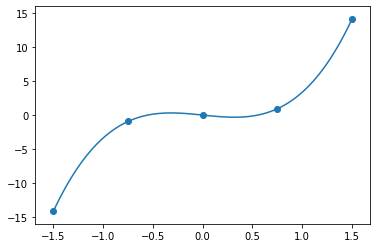

In [4]:
plt.plot(X,Y)
plt.scatter(x_i,y_i)

# Wada wzoru Lagrange'a

Złożoność obliczeniowa wyliczenia wartości wielomianu w punkcie $x$ -  $O(n^2)$

$$
L(x)=\sum_{j=0}^n y_j l_j(x)
$$

## Interpolacja barycentryczna

Modyfikacja interpolacji Lagrange’a

$$l(x)=(x-x_0)(x-x_1)\ldots(x-x_n)$$

Wagi barycentryczne:
$$
w_j=\frac{1}{\prod_{k\neq j} (x_j-x_k)},\ j=0,\ldots,\ n
$$

Funkcje bazowe
$$
l_j(x)=l(x)\frac{w_j}{x-x_j}
$$

# Pierwsza forma wzoru barycentrycznego


$$L(x)=l(x)\sum_{j=0}^{n}y_j\frac{w_j}{x-x_j}$$

Złożoność O(n)



# Usprawnienie
Interpolacja funkcji stałej równej 1
$$
1=\sum_{j=0}^n  l_j(x)=l(x)\sum_{j=0}^{n}\frac{w_j}{x-x_j}
$$
Podzielenie funkcji przez 1

$$
L(x)=\frac{L(x)}{1}=\frac{l(x)\sum_{j=0}^{n}y_j\frac{w_j}{x-x_j}}{l(x)\sum_{j=0}^{n}\frac{w_j}{x-x_j}}
$$


# Druga forma wzoru barycentrycznego

$$
L(x)=\frac{\sum_{j=0}^{n}y_j\frac{w_j}{x-x_j}}{\sum_{j=0}^{n}\frac{w_j}{x-x_j}}
$$



# Przykład


In [9]:
x_i=np.array([-1.5, -0.75, 0, 0.75, 1.5])
y_i=np.array([-14.1014,-0.931596,0,0.931596,14.1014])

bar_w= lambda i : 1/np.prod(x_i[i]-np.delete(x_i,i))
w_i=np.array([bar_w(0),bar_w(1),bar_w(2),bar_w(3),bar_w(4)])

Y=[]
X=np.linspace(-1.499,1.499,100)
for x in np.nditer(X):
    # pierwsza forma
    #Y.append(np.prod(x-x_i)*y_i*w_i@(1/(x-x_i))) 
    #druga forma
    L=w_i/(x-x_i)
    Y.append(y_i@L/sum(L))
    
Y=np.array(Y)

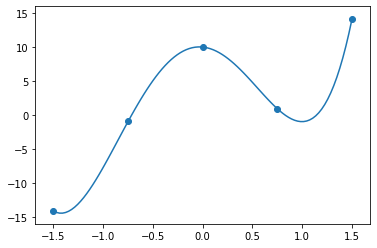

In [10]:
plt.plot(X,Y)
plt.scatter(x_i,y_i)